📂 Current notebook folder is:
C:\Users\SHIVAIN GUPTA

✅ Titanic dataset loaded successfully!

📄 First 5 rows of data:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN 

C:\Users\SHIVAIN GUPTA\AppData\Local\Temp\ipykernel_10540\3583945166.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\SHIVAIN GUPTA\AppData\Local\Temp\ipykernel_10540\3583945166.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves


📏 Numerical features standardized.
         Age      Fare
0 -0.565736 -0.502445
1  0.663861  0.786845
2 -0.258337 -0.488854
3  0.433312  0.420730
4  0.433312 -0.486337


D:\jupyt\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


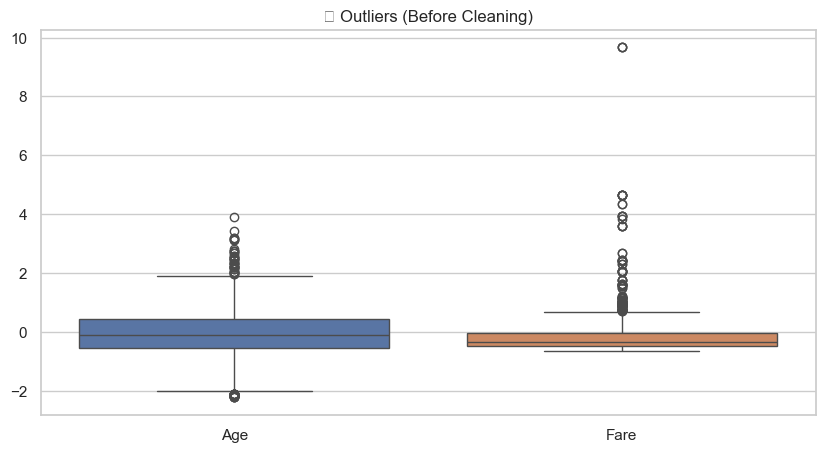


🧹 Outliers removed. New shape: (864, 12)

🚀 Final dataset ready for ML training!
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    0 -0.565736      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  0.663861      1   
2                             Heikkinen, Miss. Laina    1 -0.258337      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.433312      1   
4                           Allen, Mr. William Henry    0  0.433312      0   

   Parch            Ticket      Fare  Embarked_Q  Embarked_S  
0      0         A/5 21171 -0.502445       False        True  
1      0          PC 17599  0.786845       False       False  
2      0  STON/O2. 3101282 -0.488854      

In [6]:
# ✅ Step 0: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ✅ Check current notebook folder
print("📂 Current notebook folder is:")
print(os.getcwd())  # This tells you where to paste your CSV file

# ✅ Step 1: Load the dataset (CSV must be in the same folder as the notebook)
df = pd.read_csv("titanic.csv")  # Make sure the file is renamed as titanic.csv and placed here
print("\n✅ Titanic dataset loaded successfully!")

# ✅ Step 2: Explore the data
print("\n📄 First 5 rows of data:\n", df.head())
print("\n🔢 Dataset shape:", df.shape)
print("\n📊 Data types:\n", df.dtypes)
print("\n❓ Missing values:\n", df.isnull().sum())

# ✅ Step 3: Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)  # Too many missing values

print("\n✅ Missing values handled.\n", df.isnull().sum())

# ✅ Step 4: Convert categorical to numerical (Encoding)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

print("\n🔧 Categorical variables encoded.\n", df.head())

# ✅ Step 5: Normalize/Standardize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

print("\n📏 Numerical features standardized.\n", df[['Age', 'Fare']].head())

# ✅ Step 6: Visualize and remove outliers
from scipy import stats
import numpy as np

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title('📦 Outliers (Before Cleaning)')
plt.show()

z_scores = np.abs(stats.zscore(df[['Age', 'Fare']]))
df = df[(z_scores < 3).all(axis=1)]  # Keep only values within z < 3

print("\n🧹 Outliers removed. New shape:", df.shape)

# ✅ Step 7: Final check
print("\n🚀 Final dataset ready for ML training!\n", df.head())
